In [ ]:
# 0) При реализации алгоритма разрешается использовать только библиотеки из requierments.txt

В него входит:
1. jupyter - библиотека для показа ноутбуков
2. numpy - библиотека для вычислений
3. matplotlib - библиотека для визуализации

## Установка 

1. Устанавливаем python3 и virtualenv
2. создаем окружение virtualenv --no-site-packages  lin_prog
3. активируем окружение source activate lin_prog
4. устанавливаем зависимости pip install -r requirements.txt
5. запускаем jupyter и начинаем работать jupyter notebook



# ==========================================================
# Задача на МНК (0.4 балла)

In [6]:
from math import sin
import numpy as np

"""Пусть физический закон описывается зависимостью 
некоторого измеряемого значения y(x, a) 
от времени и координаты x при параметрах a:"""
def y(t,a): 
    return a[2]*sin(t)+a[1]*t +a[0]
    
"""
Дан набор координат t размера m, значения распределены равномерно). Пусть m = 200.
"""
m=200
t=[i*10.0/m for i in range(m)]


"""Для каждого момента времени t сгенерируйте соответствующее 
значение y(t,a) при некоторых параметрах  a_0, a_1, a_2. Для примера: """
a=[10,100,1000]

def get_y (a, σ):
    """Результаты измерений отличаются от истинных значений в силу действия случайной аддитивной помехи 
    (случайность подчиняется нормальному закону распределения N(0, σ))"""
    y_real=np.array([y(i,a) for i in t])
    y_corr=y_real+np.random.normal(0,σ,m)
    return y_real, y_corr

#todo -выбрать параметр
σ=0.5

#генерация значений. изначальные и с помехами
y_real, y_corr= get_y(a,σ)


def get_params (y_corr, t, method=0):
    """
    По сгенерированному набору точек y_corr дайте оценку параметрам a
    закона с учетом знания общей формулы тремя различными способами:
    •	method=0 -> сумма квадратов невязок будет минимальна.
    •	method=1 -> сумма абсолютных значений невязок будет минимальна.
    •	method=2 -> максимальное абсолютное значение невязки будет минимально.
    
    #todo - написать ф-ю
    """
    A = np.vstack([x, np.ones(len(x))]).T
    return np.linalg.lstsq()
    
    
    return [0,0,0]

## Задание 1 (0.2 балла)
1.	Постройте в одной координатной плоскости графики у(t, a) и  оценочные значения y(t,a*) для всех 3 методов

2.	Вычислите как отличается каждый из оценочных параметров от своего истинного значения. Как меняется это отличие при изменении σ?
3.	Скорректируйте y_corr[0]  и y_corr[-1] пусть одно из них будет на 50 больше, а другое на 50 меньше. Постройте новые оценочные значения параметров  и соответствующие графики. Какая из оценок получилась более устойчивой к выбросам?

## Задание 2 (0.2 балла)
Возьмем случайную матрицу A  200x80 и случайный вектор b из распределения N(0,1). 

1. Решите переопределенную систему тремя способами, минимизируя l1, l2 и linf нормы вектора b – Ax.
2. Постройте распределение ошибок для каждого решения.
3. Какими свойствами обладают распределения?

In [7]:
sample = np.random.normal(size=(200, 80))


# ============================================================
# Задача на Симплекс метод

## 1) На вход Вашему функцию должны приходить:

0. число переменных = n
1. матрица A (n x m) (tsv, вещественные числа)
2. вектор  b  ограничений типа неравнство
4. вектор c функции полезности для задачи max cx 
5. алгоритм выбора входящей переменной (правило Бленда, Лексикографический метод)
6. (не обязательный параметр) стартовую базисную точку

## 2) На выход программа должна выдавать:

### Обязательная часть (0.3 баллов):
0. Ответ и оптимальную точку при положительных компонентах вектора b
1. Количество итераций потребовавшихся для решения задачи
2. при n=2 выдавать процесс решения (draw=True)
3. Напишите программу которая будет отвечать на вопрос оптимально ли приведенное решение, например


### Дополнительная часть  (0.8 балл):
0. Максимально использовать матричные вычисления (0.2 балла)
1. Работать в случае отрицательных чисел в векторе b (0.2 балла)




In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

#пример из листочка 1
A=np.array([[1,2],[2,0.5]])
b=np.array([5,8])
c=np.array([5,1])
# (array([ 4.,  0.]), 20.0, 1)

# A=np.array([[1,-1],[2,-1], [0, 1]])
# b=np.array([1,3,5])
# c=np.array([4,3])
# (array([ 4.,  5.]), 31.0, 3)

# A=np.array([[2,3,1],[4,1,2],[3,4,2]])
# b=np.array([5, 11, 8])
# c=np.array([5, 4, 3])
# (array([ 2.,  0.,  1.]), 13.0, 2)

# A=np.array([[1,1,1,1],[2,1,-1,-1],[0,-1,0,1]])
# b=np.array([40, 10, 10])
# c=np.array([0.5, 3,1,4])
# (array([  0.,  15.,   0.,  25.]), 145.0, 2)

In [10]:
import numpy as np
import logging as log
import sys
log.basicConfig(level=log.INFO, format='>%(message)s', stream=sys.stdout)


def is_optimal (A,b,c, x):
    """
    Здесь должна быть реализована проверка оптимальности точки. 
    Алгоритм должен работать для фиксированных n,m за константное время
    """
    return (x==np.array([4,0])).all()

In [90]:


def solve_lin_prog (A, b, c, method='blend', start_point=None, draw=False):
    """
    Здесь должно быть ваше решение. У всех действий должны быть комментарии. 
    Код должен быть читабельным, хорошо использовать дополнительные функции если это необходимо
    
    A, b, c - матрица, b - вектор ограничений типа <=, с - функция полезности, задача максимизации
    method - 'blend', 'lexical'
    start_point - точка
    draw -  true/false рисовать ли ответ, только для 2 переменных
    
    Вывод - вектор на котором достигается максимум, максимальное значение, число итераций
    """
    
    # Если есть отрицательные значения в b, запускаем инициализацию
    if np.count_nonzero(b < 0) > 0:
        pass
    
    # Инициализируем матрицы и прочее
    
    b = b.reshape((-1, 1))
    
    mid = np.hstack((A, b))
    bottom_line = np.hstack((-c, 0))
    
    ST = np.vstack([mid, bottom_line]).astype(np.float64)
    log.info('%s'%ST)
    n = A.shape[0]
    m = A.shape[1]
    log.info('n=%s, m=%s'%(n, m))
    
    basis = list(range(0, n))
    nonbasis = list(range(n, (n)+(m)))
    log.debug("basis %s, nonbasis %s"%(basis, nonbasis))

    iteration_number = 0
    
    #тут рисуем анимацию
#     if draw:
#         fig, ax= plt.subplots(num_iter+1)
#         fig.set_figheight(5*(num_iter+1))
#         fig.set_figwidth(5)
#         xs=[[0,0],[4,0]]

#         for i,a in enumerate(ax):
#             a.plot([0,5],[5,0],  color='b')
#             a.plot([4,0],[0,16], color='b')
#             a.plot([0,0],[0,5], color='b')
#             a.plot([0,4],[0,0], color='b')
#             a.axis([-1, 17, -1, 17])
#             a.set_xlabel('X1')
#             a.set_ylabel('X2')
#             a.set_title('Iteration %d x=(%.2f, %.2f)' % (i+1,xs[i][0],xs[i][1]))

#         ax[0].scatter([0,4,3.66],[5,0,1.33], color='black')
#         ax[0].scatter([0],[0], color='red')

#         ax[1].scatter([0,0,3.66],[0,5,1.33], color='black')
#         ax[1].scatter([4],[0], color='red')


#         plt.tight_layout()
#         plt.show()
    
    def is_valid_solution(x):
        return (A@x.reshape((-1,1))<=b).all()
    
    # Рисует ограничения, допустимые угловые точки отмечает чёрными точками, текущую - красной.
    def draw_lines(x):
        a = plt.gca()
        plt.axes().set_aspect('equal')#, 'datalim')
        #a.axis([-1, 17, -1, 17])
        a.set_xlabel('X1')
        a.set_ylabel('X2')
        #plt.xlim(xmin=-1)
        #plt.ylim(ymin=-1)
        # Ограничения
        for i in range(0, A_plot.shape[0]):
            a_, b_ = A_plot[i]
            c_ = b_plot[i][0]
            print(a_, b_, c_)
            print(c_/b_, c_/a_)
            plt.plot([0, c_/a_], [c_/b_, 0], color='blue')
            plt.plot([0, c_/a_], [0, 0], color='blue')
            plt.plot([0, 0], [c_/b_, 0], color='blue')
        
        # Пересечения
        for i in range(0, A_plot.shape[0]):
            for j in range(0, i):
                if i != j:
                    a_, b_ = A_plot[i]
                    c_ = b_plot[i][0]
                    d_, e_ = A_plot[j]
                    f_ = b_plot[j][0]
                    print(a_, b_, c_, d_, e_, f_)
                    x_ = (b_*f_-c_*e_)/(b_*d_-a_*e_)
                    y_ = (c_*d_-a_*f_)/(b_*d_-a_*e_)#(c_-a_*x_)/b_
                    print(x_, y_)
                    if is_valid_solution(np.array([x_, y_])):
                        plt.scatter([x_], [y_], color='black')
        plt.scatter([x[0]], [x[1]], color='red')
    
    A_plot = np.vstack([A, np.array([[1,0], [0,1]])])
    b_plot = np.vstack([b, [[0],[0]]])
        
    if draw == True:
        
        plt.plot()
        draw_lines([[0],[0]])
        plt.show()

    def get_solution(basis, ST):
        x = np.zeros(m)
        w = np.zeros(n)
        for i in range(0, n):
            if 0<=basis[i]<n:
                w[basis[i]] = ST[:,-1][i]
            if basis[i]>=n:
                x[basis[i]-n] = ST[:,-1][i]
        log.info('%s %s', x, w)
        return x, w
    
    solutions = [np.zeros(m)]
    while np.min(ST[-1]) < 0:
        iteration_number += 1
        log.info('          ITERATION #%s'%iteration_number)
        
        #Разрешающий столбец
        log.debug('%s'%ST[-1])
        j = np.argmin(ST[-1][:-1])
        log.info('j=%s'%j)

        ratios = ST[:, -1]/ST[:, j]
        log.debug('%s'%ratios)
        i = np.argmin(np.ma.array(ratios[:-1], mask=(ratios[:-1]<0)))
        log.info('i=%s'%i)

        #Строим новую таблицу
        ST_ = ST.copy()
        basis[i], nonbasis[j] = nonbasis[j], basis[i]
        log.debug("basis %s, nonbasis %s"%(basis, nonbasis))
        ST_[i][j] = 1/ST[i][j]
        log.debug("%s"%ST_)
        ST_[i][np.arange(m+1) != j] = ST[i][np.arange(m+1) != j]/ST[i][j]
        log.debug("%s"%ST_)
        ST_[:, j][np.arange(n+1) != i] = -ST[:, j][np.arange(n+1) != i]/ST[i][j]
        log.debug("%s"%ST_)

        for i_ in range(0, n+1):
            for j_ in range(0, m+1):
                #print(i_, j_, ST[i_][j],ST[i][j_],ST[i][j])
                if i_ != i and j_ != j:
                    ST_[i_][j_] = ST[i_][j_] - ST[i_][j]*ST[i][j_]/ST[i][j]#(ST[i][j]*ST[i_][j_]-ST[i_][j]*ST[i][j_])/ST[i][j]

        log.info("%s"%ST_)
        ST = ST_
        
        x, w = get_solution(basis, ST)
        solutions.append(x)
        
        if draw == True:
            #A_plot = ST[:-1, :-1]
            #b_plot = x.reshape((-1,1))
            plt.plot()
            draw_lines(x)
            plt.show()
    
    print('FINISHED in %d iterations'%iteration_number)
    
    print('path', solutions)
    x, w = get_solution(basis, ST)
    
    return x, ST[-1][-1], iteration_number


>[[ 1.   2.   5. ]
 [ 2.   0.5  8. ]
 [-5.  -1.   0. ]]
>n=2, m=2
1.0 2.0 5
2.5 5.0
2.0 0.5 8
16.0 4.0
1.0 0.0 0
nan 0.0
0.0 1.0 0
0.0 nan
2.0 0.5 8 1.0 2.0 5
3.85714285714 0.571428571429
1.0 0.0 0 1.0 2.0 5
-0.0 2.5
1.0 0.0 0 2.0 0.5 8
-0.0 16.0
0.0 1.0 0 1.0 2.0 5
5.0 0.0
0.0 1.0 0 2.0 0.5 8
4.0 0.0
0.0 1.0 0 1.0 0.0 0
0.0 0.0


/home/sharik/.pyenv/versions/3.6.0/lib/python3.6/site-packages/ipykernel_launcher.py:83: RuntimeWarning: invalid value encountered in true_divide
/home/sharik/.pyenv/versions/3.6.0/lib/python3.6/site-packages/ipykernel_launcher.py:84: RuntimeWarning: invalid value encountered in true_divide
/home/sharik/.pyenv/versions/3.6.0/lib/python3.6/site-packages/ipykernel_launcher.py:86: RuntimeWarning: invalid value encountered in true_divide
/home/sharik/.pyenv/versions/3.6.0/lib/python3.6/site-packages/ipykernel_launcher.py:85: RuntimeWarning: invalid value encountered in true_divide


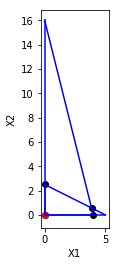

>          ITERATION #1
>j=0
>i=1
>[[ -0.5    1.75   1.  ]
 [  0.5    0.25   4.  ]
 [  2.5    0.25  20.  ]]
>[ 4.  0.] [ 1.  0.]
1.0 2.0 5
2.5 5.0
2.0 0.5 8
16.0 4.0
1.0 0.0 0
nan 0.0
0.0 1.0 0
0.0 nan
2.0 0.5 8 1.0 2.0 5
3.85714285714 0.571428571429
1.0 0.0 0 1.0 2.0 5
-0.0 2.5
1.0 0.0 0 2.0 0.5 8
-0.0 16.0
0.0 1.0 0 1.0 2.0 5
5.0 0.0
0.0 1.0 0 2.0 0.5 8
4.0 0.0
0.0 1.0 0 1.0 0.0 0
0.0 0.0


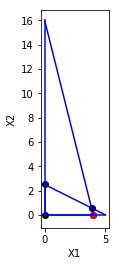

FINISHED in 1 iterations
path [array([ 0.,  0.]), array([ 4.,  0.])]
>[ 4.  0.] [ 1.  0.]


(array([ 4.,  0.]), 20.0, 1)

In [91]:
solve_lin_prog(A, b, c, draw=True)

In [13]:
x, best, n_iter = solve_lin_prog(A,b,c, draw=True)

>[[ 1.   2.   5. ]
 [ 2.   0.5  8. ]
 [-5.  -1.   0. ]]
>n=2, m=2
>          ITERATION #1
>j=0
>i=1
>[[ -0.5    1.75   1.  ]
 [  0.5    0.25   4.  ]
 [  2.5    0.25  20.  ]]
FINISHED in 1 iterations
>[ 4.  0.] [ 1.  0.]


In [7]:
print (u'Точка: ', x)
print (u'Ответ: ', best)
print (u'Число итераций: ', n_iter)

Точка:  [4 0]
Ответ:  20
Число итераций:  1


In [8]:
is_optimal(A,b,c,x)

True

## Бонус +1 Балл
Напишите программу которая для обоих методов из задачи 5 будет использовать 2^n-1 итераций (бонус за каждый метод) и напишите обоснование (итого 0.5 балла за каждый метод)